# This is the first ipynb file. This ipynb file has only done the image collecting and labelling task. kindly go to tf_object_detection.ipynb file after you complete this.

In [1]:
import os
import cv2
import time
import uuid

In [2]:
labels = ['thumbsup','thumbsdown']
number_imgs = 5

In [3]:
image_path = os.path.join('Tensorflow','workspace','images','collectedimages')

In [4]:
print(image_path)

Tensorflow/workspace/images/collectedimages


In [6]:
if not os.path.exists(image_path):
    if os.name == 'posix':
        !mkdir -p {image_path}
    if os.name == 'nt':
        !mkdir {image_path}

In [7]:
for label in labels:
    dir_path = os.path.join(image_path, label)
    if not os.path.exists(dir_path):
        !mkdir {dir_path}

# Collecting the real-time images using the OpenCV

In [8]:
cap = cv2.VideoCapture(0)

for label in labels:
    print(f'collecting images for {label}')
    time.sleep(5)
    for i in range(1,number_imgs+1):
        print(f'collecting image no:{i}')
        ret, frame = cap.read()
        imgname = os.path.join(image_path,label,label+f'.{str(uuid.uuid1())}.jpg')
        
        cv2.imwrite(imgname,frame)
        cv2.imshow('WebCame', frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

collecting images for thumbsup
collecting image no:1
collecting image no:2
collecting image no:3
collecting image no:4
collecting image no:5
collecting images for thumbsdown
collecting image no:1
collecting image no:2
collecting image no:3
collecting image no:4
collecting image no:5


Images are collected through a webcam with each image having a unique name.

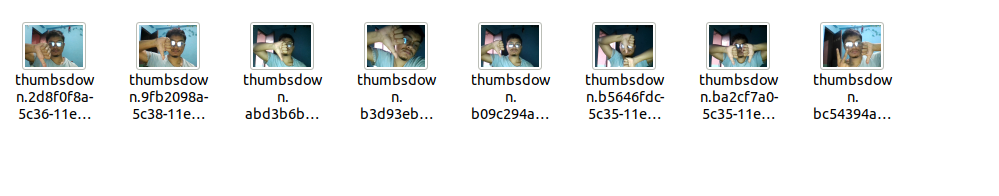

# Labelling the image

In [9]:
label_img = os.path.join('Tensorflow','labelImg')

In [10]:
if not os.path.exists(label_img):
    !mkdir {label_img}
    !git clone git@github.com:heartexlabs/labelImg.git {label_img}

Cloning into 'Tensorflow/labelimg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 1.42 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


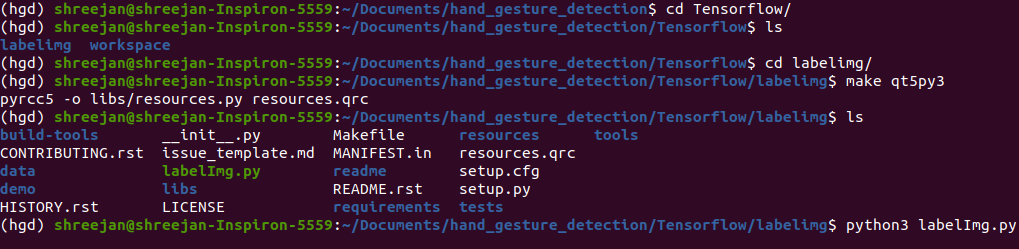

Go to Open Dir and select each image directory subsequently after you label every image of the directory.

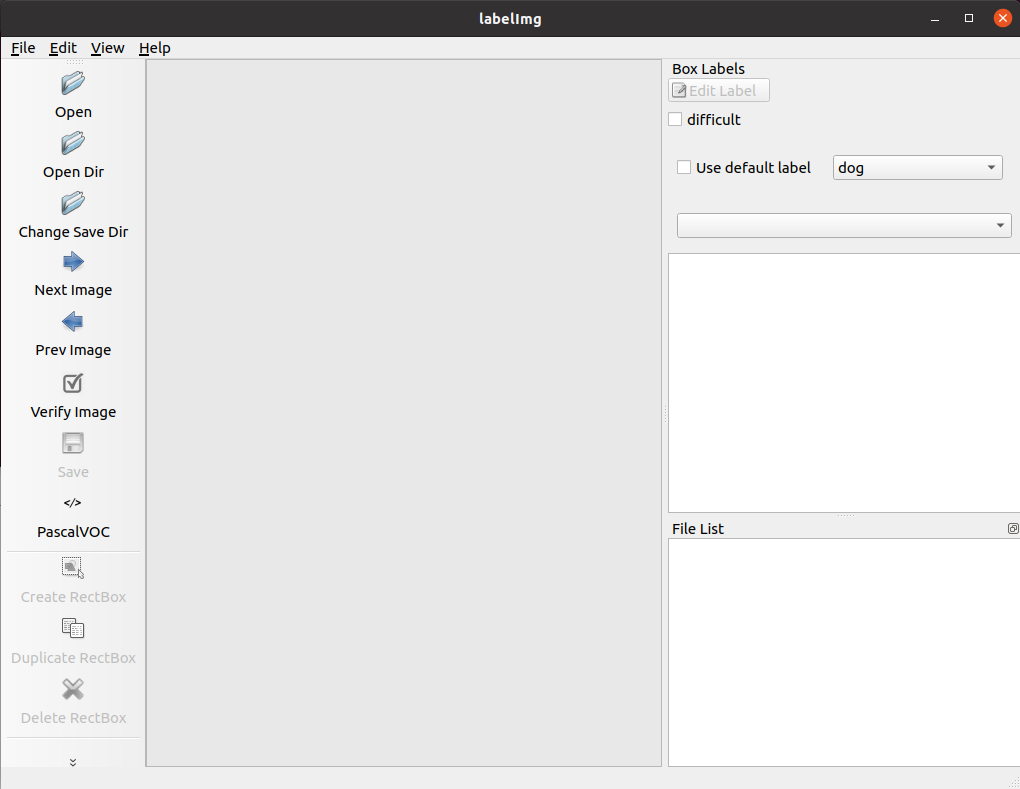

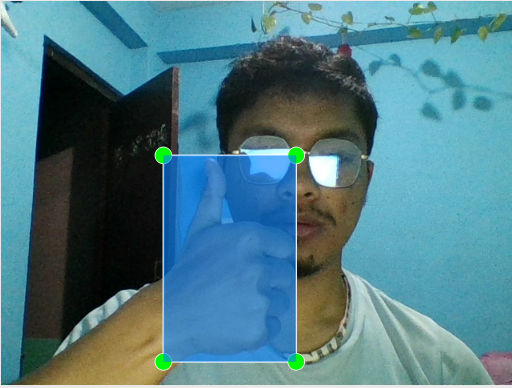

After you draw the box around the targeted area and save it, we will get a Xml file.

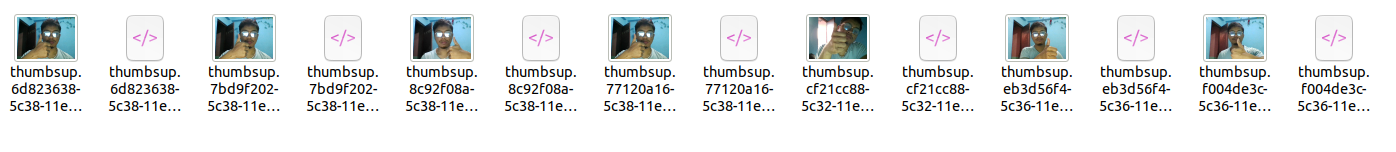

Do for both thumbsup and thumbsdown. Then make 2 new directories i.e. train and validation and cut & paste a few of the images to train and a few to the validation.

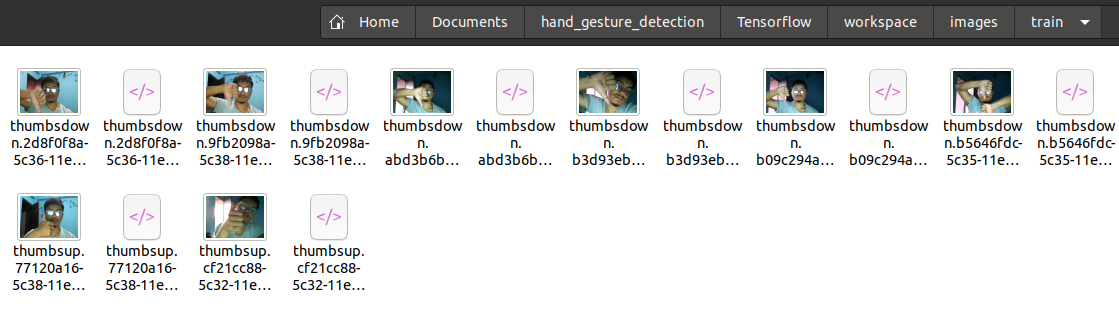

Now, time to go to tf_object_detection.ipynb file.